# **Ad Click Prediction**
#### An Ad- Agency analyzed a dataset of online ads and used a machine learning model to predict whether a user would click on an ad or not.


In [1]:
import numpy as np                   
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns             

In [4]:
#import data
data = pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q10\advertising.csv')

In [5]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
data.shape

(1000, 10)

## **Are there any duplicate records present?**

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull ().values.any ()

False

In [11]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

As the value above is zero, there areno duplicates. 

# Attribute Type Classification

## Determing the type of attributes in the given dataset

In [12]:
#extracting numerical and categorical columns

num_col = [col for col in data.columns if data[col].dtypes != 'O']
cat_col = [col for col in data.columns if data[col].dtypes == 'O']

In [13]:
num_col

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 'Clicked on Ad']

In [14]:
cat_col

['Ad Topic Line', 'City', 'Country', 'Timestamp']

# Exploratory Data Analysis

## What age group does the dataset majorly consist of?

C:\Users\pc\AppData\Local\Temp\ipykernel_11068\2633197404.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))


<AxesSubplot:xlabel='Age', ylabel='Density'>

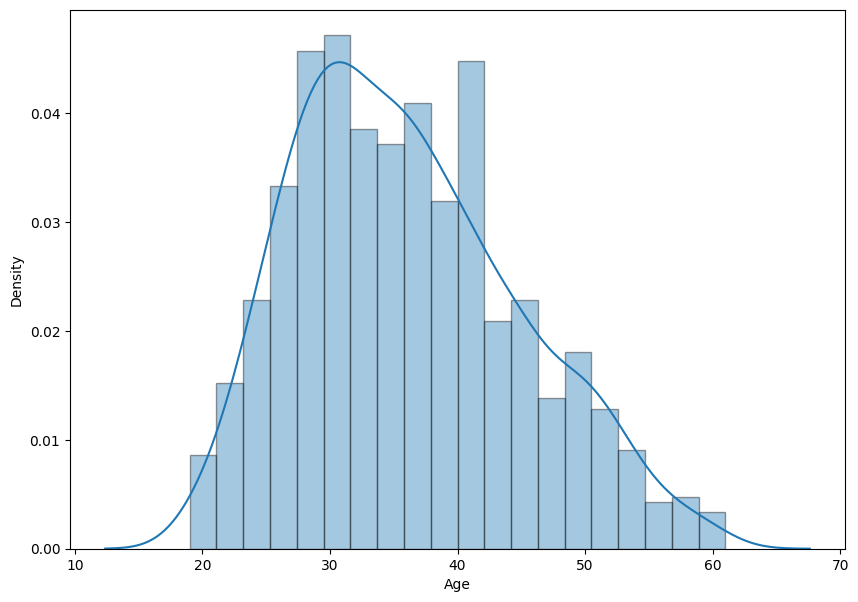

In [15]:
plt.figure(figsize=(10,7))
sns.distplot(data['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

Here, we can see that most of the internet users are having age in the range of 26 to 42 years.

In [16]:
print('Age of the oldest person:', data['Age'].max(), 'Years')
print('Age of the youngest person:', data['Age'].min(), 'Years')
print('Average age in dataset:', data['Age'].mean(), 'Years')

Age of the oldest person: 61 Years
Age of the youngest person: 19 Years
Average age in dataset: 36.009 Years


In [20]:
### Which gender has clicked more on online ads?

In [22]:
data.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()


Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


### **Maximum number of internet users belong to which country in the given dataset?**

In [31]:
pd.crosstab(index=data['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


## What is the income distribution in different age groups? 

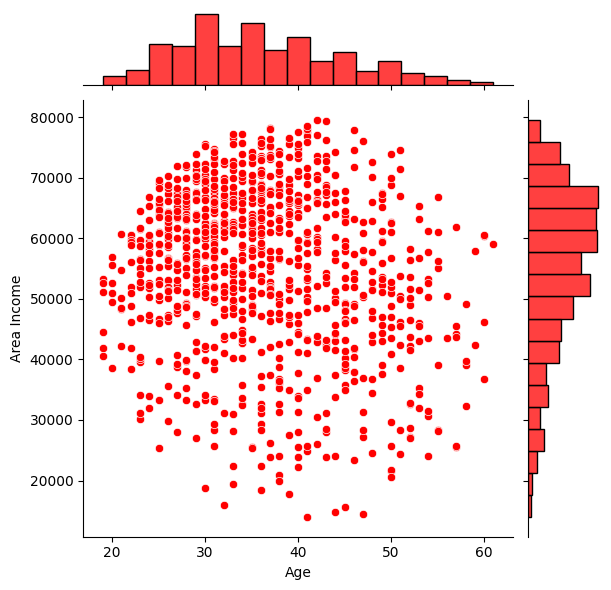

In [26]:
sns.jointplot(x='Age', y='Area Income', color= "red", data= data)

Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k.

## Which age group is spending maximum time on the internet? 

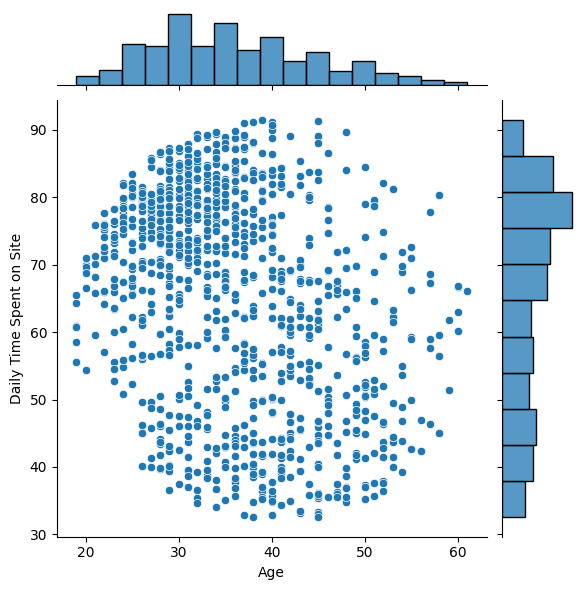

In [27]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= data)

From the above plot its evident that the age group of 25-40 is most active on the internet.

Based on above data we can see that a greater number of females have clicked on ads compared to male.

Based on the above data frame we can observe that maximum number of users are from France and Czech.

## Did we match our baseline that we set?

In [34]:
data.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()


C:\Users\pc\AppData\Local\Temp\ipykernel_11068\2503424702.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income',


,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


# Data Cleaning

As we see, we don't have any missing data

Considering the 'Advertisement Topic Line', we decided to drop it.

As to 'City' and the 'Nation', we can supplant them by dummy variables with numerical features, Nonetheless, along these lines we got such a large number of new highlights.

Changing 'Timestamp' into numerical value is more complicated. So, we can change ‘Timestamp’ to numbers or convert them to spaces of time/day and consider it to be categorical and afterwards we converted it into numerical values. And we selected the month and the hour from the timestamp as features

In [35]:
data['City Codes']= data['City'].astype('category').cat.codes

In [37]:
data['Country Codes'] = data['Country'].astype('category').cat.codes

In [38]:
data[['City Codes','Country Codes']].head(5)

,City Codes,Country Codes
0,961,215
1,903,147
2,111,184
3,939,103
4,805,96


In [39]:
data['Month'] = data['Timestamp'].apply(lambda t: t.split('-')[1])
data['Hour'] = data['Timestamp'].apply(lambda t: t.split(':')[0].split(' ')[1])

In [40]:
data[['Month','Hour']].head(5)

,Month,Hour
0,03,00
1,04,01
2,03,20
3,01,02
4,06,03


# Data Model Implementation

Dropping 

In [42]:
X = data.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

In [43]:
Y = data['Clicked on Ad']

**Splitting Dataset**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 30)

**Implementing Naive Bayes Model**

In [47]:
from sklearn.naive_bayes import GaussianNB

In [49]:
NB_model = GaussianNB()

In [50]:
NB_model.fit(X_train, Y_train)

GaussianNB()

In [51]:
nav_bayes_pred = NB_model.predict(X_test)

In [62]:
from sklearn.metrics import classification_report 
from sklearn import metrics


In [63]:
nav_bayes_accuracy = metrics.accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

97.5


**Implementing Decision Tree Model**

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dec_tree_model = DecisionTreeClassifier()

In [66]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [67]:
dec_tree_pred = dec_tree_model.predict(X_test)

In [0]:
dec_tree_accuracy = metrics.accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100);

93.33333333333333


# Conclusion

#### Comparing all the above implementation models, we conclude that Naive Bayes Algorithm gives us the maximum accuracy for determining the click  probability. We believe in future there will be fewer ads, but they will be more relevant. And also these ads will cost more and will be worth it. 